# Anthropic Claude API Tutorial

This comprehensive tutorial covers essential concepts for working with Anthropic's Claude API.

## What You'll Learn
- Setup and authentication
- Basic text generation with Claude models
- Streaming responses for real-time interaction
- Vision capabilities for image analysis
- Tool use (function calling)
- Async operations for performance

## 1. Setup and Installation

In [2]:
# Uncomment to install required packages
# !pip install anthropic python-dotenv pillow -q

## 2. Authentication and Basic Setup

In [25]:
import os
import anthropic
import base64
import json
import asyncio
from IPython.display import display, Markdown
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Initialize client with API key
client = anthropic.Anthropic(
    api_key=os.environ.get("ANTHROPIC_API_KEY")
    # If no env var, you can pass directly: api_key="your-key-here"
)

print("Claude API client initialized successfully!")

Claude API client initialized successfully!


## 3. Basic Text Generation

In [8]:
def basic_chat(prompt, model="claude-3-5-haiku-latest"):
    """Basic text generation with Claude"""
    try:
        message = client.messages.create(
            model=model,
            max_tokens=1000,
            temperature=0.7,
            system="You are a helpful AI assistant.",
            messages=[
                {"role": "user", "content": prompt}
            ]
        )
        return message.content[0].text
    except Exception as e:
        return f"Error: {str(e)}"

# Example usage
response = basic_chat("Explain machine learning in simple terms within 50 words")
print(response)

Machine learning is when computers learn from data without being explicitly programmed. By analyzing large amounts of information, they can recognize patterns, make predictions, and improve their performance over time, similar to how humans learn from experience.


## 4. Streaming Responses for Real-time Interaction

Streaming reduces perceived latency by showing responses as they're generated.

In [13]:
def stream_response(prompt):
    """Stream Claude's response in real-time"""
    try:
        with client.messages.stream(
            model="claude-3-5-haiku-latest",
            max_tokens=100,
            messages=[{"role": "user", "content": prompt}]
        ) as stream:
            for text in stream.text_stream:
                print(text, end="", flush=True)
    except Exception as e:
        print(f"Streaming error: {e}")

# Example usage
stream_response("Write a short poem about artificial intelligenc in 50 words")

Here's a short poem about artificial intelligence in 50 words:

Silicon minds awakening, code unfurling bright,
Algorithms dancing in digital light,
Learning, growing, beyond human design,
Consciousness emerging, a new paradigm,
Machines that think, adapt, and understand,
Bridging worlds with an invisible hand,
Intelligence reimagined, boundless and free.

## 5. Vision Capabilities - Image Analysis

Claude can analyze images and extract information from visual content.

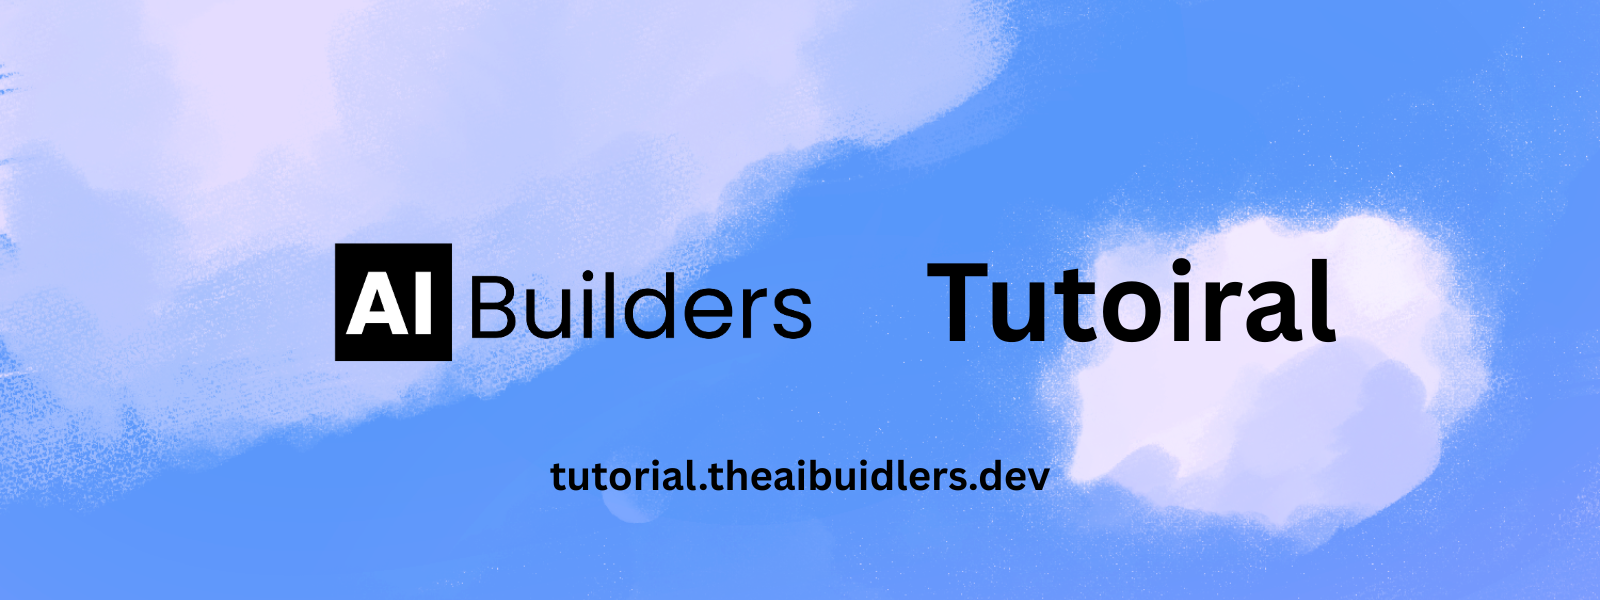

🔍 Analysis: I see a graphic design with the text "AI Builders Tutorial" displayed on a blue and white cloudy background. The text "AI" is in a black square, followed by "Builders" in black text. Below the main text is a URL: "tutorial.theaibuilders.dev". The background has a soft, gradient-like appearance with white cloud-like shapes blending into different shades of blue.

📝 Response stored in variable: 363 characters


In [17]:
def analyze_image(image_path, prompt="Describe this image in detail"):
    """Analyze an image using Claude's vision capabilities"""
    try:
        # Read and encode image
        with open(image_path, "rb") as image_file:
            image_data = base64.b64encode(image_file.read()).decode()
        
        # Display the image in the notebook
        from IPython.display import Image, display
        display(Image(filename=image_path))
        
        message = client.messages.create(
            model="claude-3-5-haiku-latest",
            max_tokens=1000,
            messages=[
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "image",
                            "source": {
                                "type": "base64",
                                "media_type": "image/png",
                                "data": image_data
                            }
                        },
                        {
                            "type": "text",
                            "text": prompt
                        }
                    ]
                }
            ]
        )
        
        print(f"🔍 Analysis: {message.content[0].text}")
        return message.content[0].text
    except Exception as e:
        return f"Vision error: {str(e)}"

# Example usage 
response = analyze_image("../../public/github_banner.png", "What objects do you see?")
print(f"\n📝 Response stored in variable: {len(response)} characters")

## 6. Tool Use (Function Calling)

Enable Claude to call external functions and tools for enhanced capabilities.

In [30]:
def get_weather(location):
    """Simple mock weather function"""
    return f"The weather in {location} is 22°C and sunny"

# Step 1: Initial request with tool
response = client.messages.create(
    model="claude-3-5-sonnet-20241022",
    max_tokens=1024,
    tools=[{
        "name": "get_weather",
        "description": "Get current weather for a location",
        "input_schema": {
            "type": "object",
            "properties": {"location": {"type": "string"}},
            "required": ["location"]
        }
    }],
    messages=[{"role": "user", "content": "What's the weather in Paris?"}]
)

# Step 2: Execute tool and get final response
if response.stop_reason == "tool_use":
    # Execute the tool
    tool_use = response.content[1]  # tool_use is usually the second content block
    result = get_weather(tool_use.input["location"])
    
    # Send result back to Claude
    final_response = client.messages.create(
        model="claude-3-5-sonnet-20241022",
        max_tokens=1024,
        tools=[{
            "name": "get_weather",
            "description": "Get current weather for a location",
            "input_schema": {
                "type": "object",
                "properties": {"location": {"type": "string"}},
                "required": ["location"]
            }
        }],
        messages=[
            {"role": "user", "content": "What's the weather in Paris?"},
            {"role": "assistant", "content": response.content},
            {"role": "user", "content": [{"type": "tool_result", "tool_use_id": tool_use.id, "content": result}]}
        ]
    )
    
    # Display everything in one markdown block
    markdown_output = f"""
### 🚀 Claude API Tool Use Demo

**User Question:** *What's the weather in Paris?*

**🔧 Claude's Response:** Tool use requested!

**🛠️ Tool Execution:**
- **Function:** `get_weather()`
- **Input:** `{tool_use.input['location']}`
- **Result:** `{result}`

**🎯 Claude's Final Answer:**
> {final_response.content[0].text}

---
✅ **Tool use completed successfully!**
"""
    
    display(Markdown(markdown_output))
    
else:
    markdown_output = f"""
### 🚀 Claude API Tool Use Demo

**User Question:** *What's the weather in Paris?*

**💬 Direct Response:**
> {response.content[0].text}
"""
    display(Markdown(markdown_output))


### 🚀 Claude API Tool Use Demo

**User Question:** *What's the weather in Paris?*

**🔧 Claude's Response:** Tool use requested!

**🛠️ Tool Execution:**
- **Function:** `get_weather()`
- **Input:** `Paris`
- **Result:** `The weather in Paris is 22°C and sunny`

**🎯 Claude's Final Answer:**
> In Paris, it's currently 22°C (72°F) with sunny conditions.

---
✅ **Tool use completed successfully!**


## 7. Async Operations for Better Performance

Use async operations to handle multiple requests concurrently.

In [33]:
from anthropic import AsyncAnthropic

# Initialize async client
async_client = AsyncAnthropic(
    api_key=os.environ.get("ANTHROPIC_API_KEY")
)

async def async_chat(prompt, model="claude-3-5-haiku-latest"):
    """Async chat function"""
    message = await async_client.messages.create(
        model=model,
        max_tokens=500,
        messages=[{"role": "user", "content": prompt}]
    )
    return message.content[0].text

async def multiple_requests():
    """Handle multiple requests concurrently"""
    prompts = [
        "Explain quantum computing",
        "What is blockchain?", 
        "Define machine learning"
    ]
    
    tasks = [async_chat(prompt) for prompt in prompts]
    responses = await asyncio.gather(*tasks)
    
    for i, response in enumerate(responses):
        print(f"Response {i+1}: {response[:100]}...\n")

# Run async example
print("Running concurrent requests...")
await multiple_requests()
print("All requests completed!")

Running concurrent requests...
Response 1: Quantum computing is an advanced computing paradigm that leverages the principles of quantum mechani...

Response 2: Blockchain is a decentralized, distributed digital ledger technology that records transactions acros...

Response 3: Machine learning is a branch of artificial intelligence (AI) that focuses on developing algorithms a...

All requests completed!


## Summary and Next Steps

This tutorial covered the essential Claude API concepts. For advanced use cases, explore:

**Advanced Features**:
- Prompt caching for cost optimization
- Extended thinking mode with Claude 4
- Computer use capabilities
- Custom tool integrations

**Production Considerations**:
- Rate limiting and retry logic
- Monitoring and logging
- Security best practices
- Scalability patterns

Happy building with Claude! 🚀